# Traffic Prediction 

Predict the volume of cars of a point at a given time:

    - What affect the number of cars at a specific point?
    - What are the daily trend /. Hourly trends / monthly trend / weekly trend
    - Does a closure at nearby point impact the traffic at that specific point
    - What affect weekend / bank holidays  have on the traffic at that specific point

## Data Loading

In [2]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pd_count_points = pd.read_csv('../data/dft_countpoints_region_id_7.csv')

In [4]:
pd_raw_count = pd.read_csv('../data/dft_rawcount_region_id_7.csv')

/var/folders/_z/nz5spzqj2rl11n5lc_k1cwwc0000gn/T/ipykernel_71450/254017237.py:1: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  pd_raw_count = pd.read_csv('../data/dft_rawcount_region_id_7.csv')


### Data Inspection

In [5]:
pd_count_points.sample()

,count_point_id,region_id,region_name,local_authority_id,local_authority_name,road_name,road_type,start_junction_road_name,end_junction_road_name,easting,northing,latitude,longitude,link_length_km,link_length_miles
697,941963,7,East of England,154,Norfolk,U,Minor,NaN,NaN,588007,283901,52.420776,0.76337,NaN,NaN


In [6]:
pd_raw_count.sample()

,count_point_id,direction_of_travel,year,count_date,hour,region_id,region_name,local_authority_id,local_authority_name,road_name,...,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
166777,58089,W,2016,2016-10-05,8,7,East of England,78,Hertfordshire,A411,...,14,41,4.0,3,0,0,0,0,7.0,526.0


In [7]:
print(f"The shape for count_points:\n{pd_count_points.shape}")

The shape for count_points:
(4981, 15)


In [8]:
print(f"The shape for pd_raw_count:\n{pd_raw_count.shape}")

The shape for pd_raw_count:
(550056, 32)


In [9]:
pd_count_points.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   count_point_id            4981 non-null   int64  
 1   region_id                 4981 non-null   int64  
 2   region_name               4981 non-null   object 
 3   local_authority_id        4981 non-null   int64  
 4   local_authority_name      4981 non-null   object 
 5   road_name                 4981 non-null   object 
 6   road_type                 4981 non-null   object 
 7   start_junction_road_name  1867 non-null   object 
 8   end_junction_road_name    1867 non-null   object 
 9   easting                   4981 non-null   int64  
 10  northing                  4981 non-null   int64  
 11  latitude                  4981 non-null   float64
 12  longitude                 4981 non-null   float64
 13  link_length_km            1872 non-null   float64
 14  link_len

In [10]:
pd_raw_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550056 entries, 0 to 550055
Data columns (total 32 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   count_point_id                550056 non-null  int64  
 1   direction_of_travel           550056 non-null  object 
 2   year                          550056 non-null  int64  
 3   count_date                    550056 non-null  object 
 4   hour                          550056 non-null  int64  
 5   region_id                     550056 non-null  int64  
 6   region_name                   550056 non-null  object 
 7   local_authority_id            550056 non-null  int64  
 8   local_authority_name          550056 non-null  object 
 9   road_name                     550056 non-null  object 
 10  road_type                     550056 non-null  object 
 11  start_junction_road_name      220716 non-null  object 
 12  end_junction_road_name        220716 non-nul

In [11]:
# Summary Statistics
pd_count_points.describe()


,count_point_id,region_id,local_authority_id,easting,northing,latitude,longitude,link_length_km,link_length_miles
count,4981.000000,4981.0,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,1872.000000,1872.000000
mean,575408.971692,7.0,119.998394,563188.690022,249144.782574,52.114775,0.384187,3.105401,1.929380
std,406875.661803,0.0,31.476089,42950.266169,44381.857675,0.393338,0.636952,4.055659,2.520322
min,6003.000000,7.0,58.000000,488780.000000,175547.000000,51.455053,-0.712785,0.100000,0.060000
25%,77179.000000,7.0,97.000000,522896.000000,211876.000000,51.786347,-0.210857,0.700000,0.430000
50%,806231.000000,7.0,123.000000,562548.000000,241947.000000,52.048042,0.362970,1.600000,0.990000
75%,941273.000000,7.0,129.000000,598282.000000,291000.000000,52.475708,0.897701,3.825000,2.375000
max,999996.000000,7.0,208.000000,655040.000000,344195.000000,52.965256,1.754553,57.400000,35.670000


In [12]:
pd_raw_count.describe()

,count_point_id,year,hour,region_id,local_authority_id,easting,northing,latitude,longitude,link_length_km,...,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
count,550056.000000,550056.000000,550056.000000,550056.0,550056.000000,550056.000000,550056.000000,550056.000000,550056.000000,220944.000000,...,550056.000000,550056.000000,550054.000000,550056.000000,550056.000000,550056.000000,550056.000000,550056.000000,550054.000000,550054.000000
mean,566127.527030,2011.358545,12.499973,7.0,119.352677,562159.984205,244950.949823,52.077520,0.366821,4.111682,...,3.433307,76.649094,14.567050,2.303116,2.931745,2.321087,9.339867,11.587802,43.050766,525.561992
std,430179.200221,6.689615,3.452071,0.0,31.083083,41663.021439,43986.036781,0.390590,0.616583,3.989123,...,7.397193,134.192051,30.591624,5.024424,7.340367,6.759177,31.185689,37.996370,104.361491,805.842646
min,6003.000000,2000.000000,3.000000,7.0,58.000000,488780.000000,175547.000000,51.455053,-0.712785,0.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48454.000000,2006.000000,9.000000,7.0,97.000000,522942.000000,207834.000000,51.753123,-0.211865,1.300000,...,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000
50%,808769.500000,2011.000000,12.000000,7.0,123.000000,561447.000000,234250.000000,51.982011,0.345157,2.800000,...,1.000000,26.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,201.000000
75%,941675.000000,2018.000000,15.000000,7.0,129.000000,593767.000000,282800.000000,52.410928,0.833575,5.500000,...,4.000000,85.000000,14.000000,2.000000,2.000000,2.000000,3.000000,3.000000,29.000000,648.000000
max,999996.000000,2023.000000,18.000000,7.0,208.000000,655040.000000,952939.000000,58.453288,1.754553,57.400000,...,1425.000000,3883.000000,2327.000000,211.000000,194.000000,520.000000,717.000000,813.000000,2691.000000,8664.000000


TODO:

- Reformate and check datatypes
- Check for duplicates 
- CHeck for NUlls

## Data Cleaning

Three main areas focus in this stage of the project:

   - Check that datatypes and formatting is all correct.
   - Check for duplicates.
   - Check for null (missing) values.
   - additionally: erroneous data

### Data Formatting

TODO:

Transform to datetime:

- count_date and hour

In [13]:
# Data Types
print("\nData types in pd_count_points:")
print(pd_count_points.dtypes)

print("\nData types in pd_raw_count:")
print(pd_raw_count.dtypes)


Data types in pd_count_points:
count_point_id                int64
region_id                     int64
region_name                  object
local_authority_id            int64
local_authority_name         object
road_name                    object
road_type                    object
start_junction_road_name     object
end_junction_road_name       object
easting                       int64
northing                      int64
latitude                    float64
longitude                   float64
link_length_km              float64
link_length_miles           float64
dtype: object

Data types in pd_raw_count:
count_point_id                    int64
direction_of_travel              object
year                              int64
count_date                       object
hour                              int64
region_id                         int64
region_name                      object
local_authority_id                int64
local_authority_name             object
road_name                

In [14]:
# conver count_date to datetime type
pd_raw_count['count_date'] =  pd.to_datetime(pd_raw_count['count_date'])

In [15]:
# Extract Date Components: Create new columns for the year, month, day, and day of the week
pd_raw_count['Month'] = pd_raw_count['count_date'].dt.month
pd_raw_count['Day_of_Week'] = pd_raw_count['count_date'].dt.day_name()
pd_raw_count['Day'] = pd_raw_count['count_date'].dt.day


- Data Integrity Checks - Unique Identifiers

In [16]:

print("\nUnique count_point_id in pd_count_points:", pd_count_points['count_point_id'].nunique())
print("Total rows in pd_count_points:", len(pd_count_points))



Unique count_point_id in pd_count_points: 4981
Total rows in pd_count_points: 4981


- Consistency Check: Ensure that all count_point_id in pd_raw_count are also in pd_count_points

In [17]:
inconsistent_ids = pd_raw_count[~pd_raw_count['count_point_id'].isin(pd_count_points['count_point_id'])]
print("\nInconsistent count_point_ids (not found in pd_count_points):")
print(inconsistent_ids)


Inconsistent count_point_ids (not found in pd_count_points):
        count_point_id direction_of_travel  year count_date  hour  region_id  \
442404          941987                   E  2009 2009-06-08     7          7   
442405          941987                   E  2009 2009-06-08     8          7   
442406          941987                   E  2009 2009-06-08     9          7   
442407          941987                   E  2009 2009-06-08    10          7   
442408          941987                   E  2009 2009-06-08    11          7   
...                ...                 ...   ...        ...   ...        ...   
442543          941987                   W  2014 2014-06-09    14          7   
442544          941987                   W  2014 2014-06-09    15          7   
442545          941987                   W  2014 2014-06-09    16          7   
442546          941987                   W  2014 2014-06-09    17          7   
442547          941987                   W  2014 2014-06-0

### Check for duplicated

In [18]:
pd_count_points.duplicated().value_counts()

False    4981
Name: count, dtype: int64

In [19]:
pd_raw_count.duplicated().value_counts()

False    550056
Name: count, dtype: int64

Notes:

- There is no duplicates. Data already aggrated

### Check for Nulls

In [20]:
# Checking for missing values
print("Missing values in pd_count_points:")
print(pd_count_points.isnull().sum())

print("\nMissing values in pd_raw_count:")
print(pd_raw_count.isnull().sum())

Missing values in pd_count_points:
count_point_id                 0
region_id                      0
region_name                    0
local_authority_id             0
local_authority_name           0
road_name                      0
road_type                      0
start_junction_road_name    3114
end_junction_road_name      3114
easting                        0
northing                       0
latitude                       0
longitude                      0
link_length_km              3109
link_length_miles           3109
dtype: int64

Missing values in pd_raw_count:
count_point_id                       0
direction_of_travel                  0
year                                 0
count_date                           0
hour                                 0
region_id                            0
region_name                          0
local_authority_id                   0
local_authority_name                 0
road_name                            0
road_type                         

TODO:
- Checking whether start junctions have matching end junctions

### Data Exploration

In [21]:
pd_count_points.shape

(4981, 15)

In [22]:
pd_count_points['start_junction_road_name'].isnull().value_counts(normalize=True)

start_junction_road_name
True     0.625176
False    0.374824
Name: proportion, dtype: float64

In [23]:
pd_count_points['end_junction_road_name'].isnull().value_counts(normalize=True)

end_junction_road_name
True     0.625176
False    0.374824
Name: proportion, dtype: float64

In [24]:
count_points_missing_junctions = pd_count_points.loc[(pd_count_points['start_junction_road_name'].isnull() & pd_count_points['end_junction_road_name'].isna())]
count_points_missing_junctions.head()

,count_point_id,region_id,region_name,local_authority_id,local_authority_name,road_name,road_type,start_junction_road_name,end_junction_road_name,easting,northing,latitude,longitude,link_length_km,link_length_miles
0,999996,7,East of England,123,Essex,B1256,Minor,NaN,NaN,565000,222232,51.874254,0.395456,NaN,NaN
1,999992,7,East of England,126,Suffolk,C,Minor,NaN,NaN,605170,267170,52.264406,1.005195,NaN,NaN
2,999991,7,East of England,154,Norfolk,C,Minor,NaN,NaN,626210,310000,52.640556,1.341984,NaN,NaN
3,999980,7,East of England,127,Southend-on-Sea,B1013,Minor,NaN,NaN,585800,188470,51.564495,0.679275,NaN,NaN
4,997628,7,East of England,154,Norfolk,C,Minor,NaN,NaN,651842,312994,52.656136,1.722287,NaN,NaN


In [25]:
count_points_missing_junctions.road_type.value_counts()

road_type
Minor    3109
Major       5
Name: count, dtype: int64

Notes:
- We can confirm that each start junction has a missing end junction. 
- Most missing junctions come from minor roads and only 5 come from Major roads.

In [26]:
count_points_missing_junctions.query("road_type == 'Minor'")

,count_point_id,region_id,region_name,local_authority_id,local_authority_name,road_name,road_type,start_junction_road_name,end_junction_road_name,easting,northing,latitude,longitude,link_length_km,link_length_miles
0,999996,7,East of England,123,Essex,B1256,Minor,NaN,NaN,565000,222232,51.874254,0.395456,NaN,NaN
1,999992,7,East of England,126,Suffolk,C,Minor,NaN,NaN,605170,267170,52.264406,1.005195,NaN,NaN
2,999991,7,East of England,154,Norfolk,C,Minor,NaN,NaN,626210,310000,52.640556,1.341984,NaN,NaN
3,999980,7,East of England,127,Southend-on-Sea,B1013,Minor,NaN,NaN,585800,188470,51.564495,0.679275,NaN,NaN
4,997628,7,East of England,154,Norfolk,C,Minor,NaN,NaN,651842,312994,52.656136,1.722287,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3104,800059,7,East of England,123,Essex,B1002,Minor,NaN,NaN,566510,201422,51.686866,0.407396,NaN,NaN
3105,800011,7,East of England,97,Cambridgeshire,B1100,Minor,NaN,NaN,548932,296187,52.543172,0.194744,NaN,NaN
3106,800010,7,East of England,97,Cambridgeshire,B1101,Minor,NaN,NaN,541942,299052,52.570776,0.092970,NaN,NaN
3107,800008,7,East of England,97,Cambridgeshire,B1052,Minor,NaN,NaN,561206,253129,52.152912,0.354926,NaN,NaN


In [27]:
pd_count_points.query("road_type == 'Minor'").start_junction_road_name.isna().value_counts()

start_junction_road_name
True    3109
Name: count, dtype: int64

In [28]:
count_points_missing_junctions.query("road_type == 'Minor'").head()

,count_point_id,region_id,region_name,local_authority_id,local_authority_name,road_name,road_type,start_junction_road_name,end_junction_road_name,easting,northing,latitude,longitude,link_length_km,link_length_miles
0,999996,7,East of England,123,Essex,B1256,Minor,NaN,NaN,565000,222232,51.874254,0.395456,NaN,NaN
1,999992,7,East of England,126,Suffolk,C,Minor,NaN,NaN,605170,267170,52.264406,1.005195,NaN,NaN
2,999991,7,East of England,154,Norfolk,C,Minor,NaN,NaN,626210,310000,52.640556,1.341984,NaN,NaN
3,999980,7,East of England,127,Southend-on-Sea,B1013,Minor,NaN,NaN,585800,188470,51.564495,0.679275,NaN,NaN
4,997628,7,East of England,154,Norfolk,C,Minor,NaN,NaN,651842,312994,52.656136,1.722287,NaN,NaN


**Findings**
- For all the `minor roads`, there are no start junctions, there are no end junctions therefore we can treat them as `traffic point`. 
- As we are missing both start and end junctions as well as road lenght, we can assume that the missing rows should be treated as `single points`. 


In [29]:
count_points_missing_junctions.query("road_type == 'Major'")

,count_point_id,region_id,region_name,local_authority_id,local_authority_name,road_name,road_type,start_junction_road_name,end_junction_road_name,easting,northing,latitude,longitude,link_length_km,link_length_miles
3460,84062,7,East of England,78,Hertfordshire,A41,Major,NaN,NaN,509478,199957,51.687706,-0.417682,0.5,0.31
3461,84061,7,East of England,78,Hertfordshire,A41,Major,NaN,NaN,509564,199697,51.685353,-0.416520,0.4,0.25
3462,84060,7,East of England,78,Hertfordshire,A41,Major,NaN,NaN,509228,199673,51.685202,-0.421385,0.3,0.19
3463,84059,7,East of England,78,Hertfordshire,A41,Major,NaN,NaN,509428,199674,51.685172,-0.418493,0.7,0.43
3464,84058,7,East of England,78,Hertfordshire,A41,Major,NaN,NaN,509005,199553,51.684167,-0.424647,0.7,0.43


- There are link_lenght and ling_legnght_miles values for major road missing values

**Notes**
- To conclude, we are not going to apply any missing value imputation methods, nor doppring because we can agree that missing values in both start and end junctions aren't valide since these road have none. 
- So, we will consider them as traffic points.

#### Traffic Volume Analysis

- Volume = sum of 

In [30]:
pd_raw_count.columns

Index(['count_point_id', 'direction_of_travel', 'year', 'count_date', 'hour',
       'region_id', 'region_name', 'local_authority_id',
       'local_authority_name', 'road_name', 'road_type',
       'start_junction_road_name', 'end_junction_road_name', 'easting',
       'northing', 'latitude', 'longitude', 'link_length_km',
       'link_length_miles', 'pedal_cycles', 'two_wheeled_motor_vehicles',
       'cars_and_taxis', 'buses_and_coaches', 'lgvs', 'hgvs_2_rigid_axle',
       'hgvs_3_rigid_axle', 'hgvs_4_or_more_rigid_axle',
       'hgvs_3_or_4_articulated_axle', 'hgvs_5_articulated_axle',
       'hgvs_6_articulated_axle', 'all_hgvs', 'all_motor_vehicles', 'Month',
       'Day_of_Week', 'Day'],
      dtype='object')

In [31]:
pd_raw_count[['count_point_id', 'all_motor_vehicles', 'all_hgvs']].sample(10)

,count_point_id,all_motor_vehicles,all_hgvs
499335,953029,34.0,5.0
210752,99313,1731.0,244.0
468373,942223,4.0,0.0
425861,941807,5.0,0.0
298851,930064,137.0,25.0
544168,997419,20.0,0.0
35528,16638,679.0,32.0
96079,36768,1408.0,41.0
169576,60000,486.0,53.0
377896,941304,53.0,23.0


In [32]:
# Finding out the busiest point

traffi_volume_by_day = pd_raw_count.groupby(['count_point_id', 'count_date']).agg({'all_motor_vehicles': sum}).reset_index()
traffi_volume_by_day.sort_values(by="all_motor_vehicles", ascending=False).head(20)

,count_point_id,count_date,all_motor_vehicles
517,7054,2021-09-01,149704.0
2794,27085,2023-06-27,147554.0
2791,27085,2017-09-18,142316.0
2792,27085,2019-05-07,142101.0
2790,27085,2015-10-09,138474.0
759,7903,2019-06-05,137989.0
515,7054,2017-06-16,137641.0
4703,46001,2014-05-16,137087.0
2788,27085,2013-06-13,136652.0
513,7054,2015-04-17,136583.0


In [33]:
traffi_volume_by_day["year"] = traffi_volume_by_day["count_date"].dt.year

In [34]:
traffic_volume_year = traffi_volume_by_day.sort_values(by=["year", "all_motor_vehicles"], ascending=False).set_index((["year", "count_point_id"]))
traffic_volume_year.head(20)

count_date  all_motor_vehicles
year count_point_id                               
2023 27085          2023-06-27            147554.0
     28440          2023-06-16            127320.0
     90074          2023-05-05            118565.0
     94149          2023-09-20            114004.0
     94152          2023-09-20            104404.0
     90070          2023-05-05             93925.0
     95029          2023-05-19             87689.0
     70027          2023-04-20             85283.0
     94001          2023-03-29             82707.0
     93036          2023-05-10             82321.0
     16001          2023-04-21             79880.0
     6208           2023-09-13             75775.0
     8383           2023-06-21             72028.0
     36001          2023-05-15             71728.0
     56031          2023-09-28             70428.0
     99819          2023-04-18             70011.0
     36032          2023-04-26             69853.0
     56327          2023-05-05             69182.0
     38462          2023-04-20             69042.0
     48454          2023-07-10             67806.0

In [58]:
# traffi_volume_by_day["year"] = traffi_volume_by_day["count_date"].dt.year

traffi_volume_by_year= pd_raw_count.groupby(['count_point_id', 'year']).agg({'all_motor_vehicles': sum}).reset_index()
traffi_volume_by_year = traffi_volume_by_year.sort_values(by=["count_point_id", "year"], ascending=[False, False])

In [53]:
top_10_points_by_yearly_volume = traffi_volume_by_year.sort_values(by="all_motor_vehicles", ascending=False).head(10).count_point_id.values[:10]

In [56]:
top_10_points_by_yearly_volume = np.unique(top_10_points_by_yearly_volume)

In [57]:
top_10_points_by_yearly_volume

array([ 7054,  7903, 27085, 46001])

In [64]:
top_10 = traffi_volume_by_year.loc[traffi_volume_by_year.count_point_id.isin(top_10_points_by_yearly_volume)]

In [66]:
top_10.columns

Index(['count_point_id', 'year', 'all_motor_vehicles'], dtype='object')

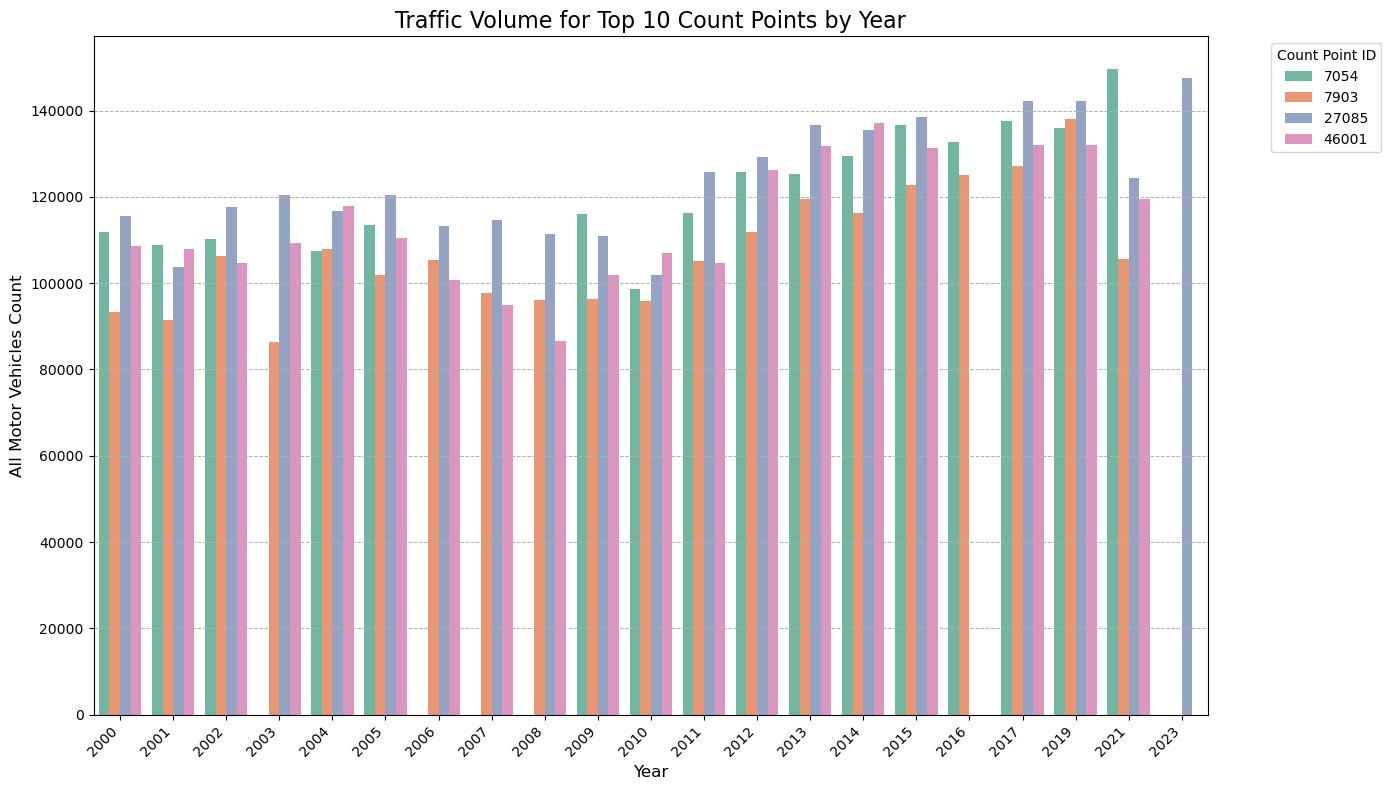

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'top_10' is your DataFrame with columns: ['count_point_id', 'year', 'all_motor_vehicles']

# Set the figure size
plt.figure(figsize=(14, 8))

# Improve the color palette
palette = sns.color_palette("Set2", n_colors=len(top_10['count_point_id'].unique()))

# Plotting the bar chart with enhancements
g = sns.barplot(x='year', y='all_motor_vehicles', hue='count_point_id', data=top_10, palette=palette)

# Set the title and labels
plt.title('Traffic Volume for Top 10 Count Points by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('All Motor Vehicles Count', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Add gridlines for better readability
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)

# Move the legend to the outside of the plot
plt.legend(title='Count Point ID', bbox_to_anchor=(1.05, 1), loc='upper left')
# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Traffic Periods: Create a column for traffic periods (e.g., morning rush, evening rush) based on the hour column.
pd_raw_count['Traffic_Period'] = pd.cut(pd_raw_count['hour'], 
                                        bins=[0, 6, 10, 16, 19, 24], 
                                        labels=['Night', 'Morning_Rush', 'Day', 'Evening_Rush', 'Late_Night'],
                                        right=False)


In [83]:
pd_raw_count[['cars_and_taxis', 'all_motor_vehicles']].describe()


,cars_and_taxis,all_motor_vehicles
count,550056.000000,550054.000000
mean,398.602911,525.561992
std,590.462086,805.842646
min,0.000000,0.000000
25%,36.000000,45.000000
50%,160.000000,201.000000
75%,512.000000,648.000000
max,7026.000000,8664.000000


<Axes: title={'center': 'Average Number of Cars by Hour'}, xlabel='hour'>

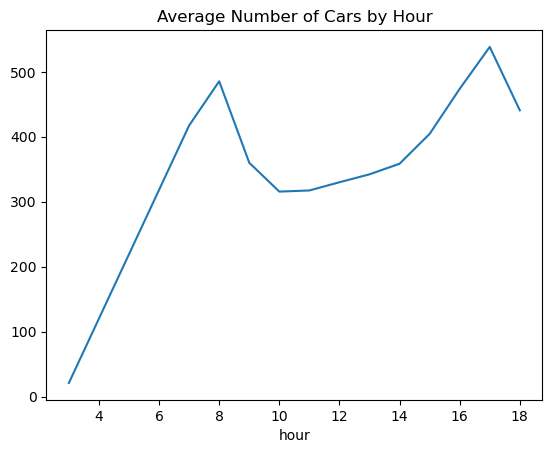

In [84]:
pd_raw_count.groupby('hour')['cars_and_taxis'].mean().plot(kind='line', title='Average Number of Cars by Hour')


<Axes: title={'center': 'Average Number of Cars by Day of the Week'}, xlabel='Day_of_Week'>

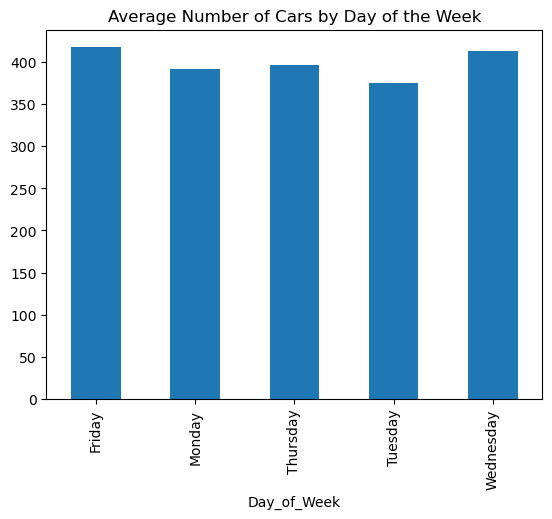

In [85]:
pd_raw_count.groupby('Day_of_Week')['cars_and_taxis'].mean().plot(kind='bar', title='Average Number of Cars by Day of the Week')


In [ ]:
pd_raw_count['count_point_id'].value_counts()

In [69]:
pd_raw_count.loc[pd_raw_count['count_point_id'] == 6213].head(10)

,count_point_id,direction_of_travel,year,count_date,hour,region_id,region_name,local_authority_id,local_authority_name,road_name,...,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
5352,6213,E,2000,2000-04-10,7,7,East of England,128,Thurrock,A13,...,3,205,61.0,7,28,6,27,21,150.0,1436.0
5353,6213,E,2000,2000-04-10,8,7,East of England,128,Thurrock,A13,...,17,213,60.0,7,29,2,32,20,150.0,1689.0
5354,6213,E,2000,2000-04-10,9,7,East of England,128,Thurrock,A13,...,12,192,77.0,9,23,6,35,19,169.0,1315.0
5355,6213,E,2000,2000-04-10,10,7,East of England,128,Thurrock,A13,...,5,215,88.0,16,32,15,31,25,207.0,1352.0
5356,6213,E,2000,2000-04-10,11,7,East of England,128,Thurrock,A13,...,1,229,86.0,13,20,4,41,13,177.0,1284.0
5357,6213,E,2000,2000-04-10,12,7,East of England,128,Thurrock,A13,...,2,244,80.0,11,26,3,36,27,183.0,1507.0
5358,6213,E,2000,2000-04-10,13,7,East of England,128,Thurrock,A13,...,3,293,87.0,24,27,5,41,11,195.0,1591.0
5359,6213,E,2000,2000-04-10,14,7,East of England,128,Thurrock,A13,...,6,388,78.0,8,33,11,30,21,181.0,1945.0
5360,6213,E,2000,2000-04-10,15,7,East of England,128,Thurrock,A13,...,13,563,104.0,12,35,10,18,20,199.0,2389.0
5361,6213,E,2000,2000-04-10,16,7,East of England,128,Thurrock,A13,...,13,715,91.0,9,17,10,26,7,160.0,3335.0


In [98]:
count_point_id_smaple = pd_raw_count.query('count_point_id == 6213')

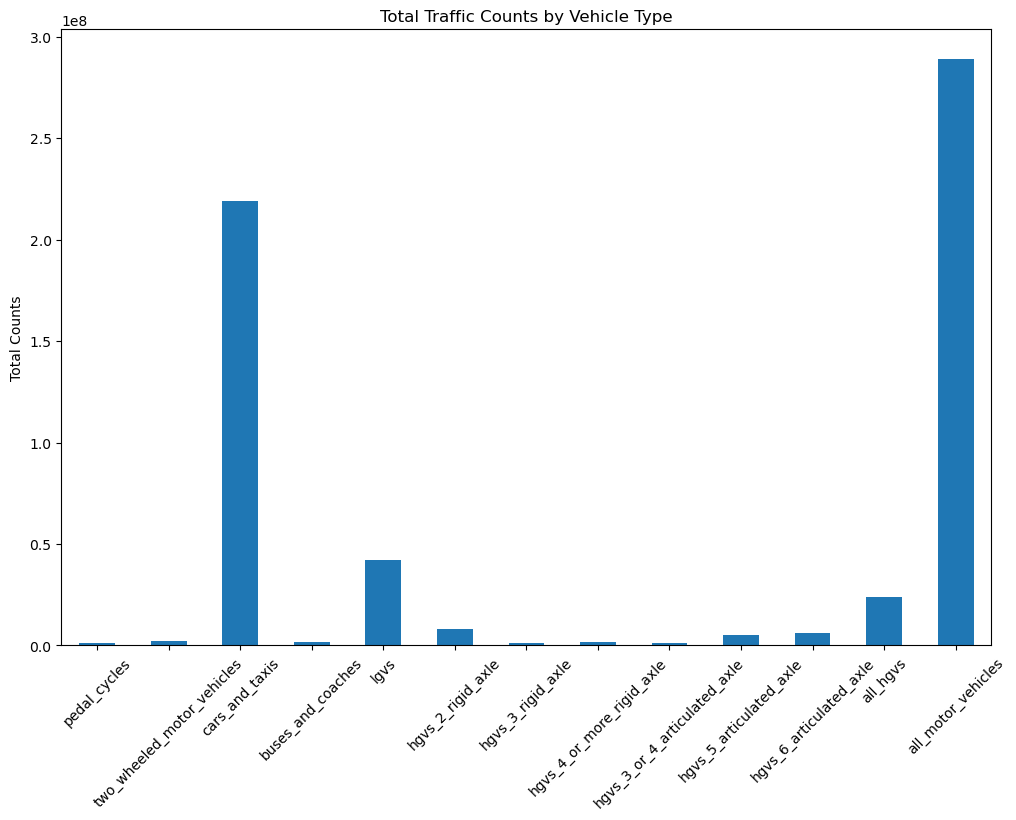

In [15]:
# 3. Exploratory Data Analysis (EDA)
# 3.1 Traffic Counts Distribution
vehicle_columns = [
    'pedal_cycles', 'two_wheeled_motor_vehicles', 'cars_and_taxis', 'buses_and_coaches',
    'lgvs', 'hgvs_2_rigid_axle', 'hgvs_3_rigid_axle', 'hgvs_4_or_more_rigid_axle',
    'hgvs_3_or_4_articulated_axle', 'hgvs_5_articulated_axle', 'hgvs_6_articulated_axle',
    'all_hgvs', 'all_motor_vehicles'
]

plt.figure(figsize=(12, 8))
pd_raw_count[vehicle_columns].sum().plot(kind='bar')
plt.title('Total Traffic Counts by Vehicle Type')
plt.ylabel('Total Counts')
plt.xticks(rotation=45)
plt.show()

<Figure size 3000x1800 with 0 Axes>

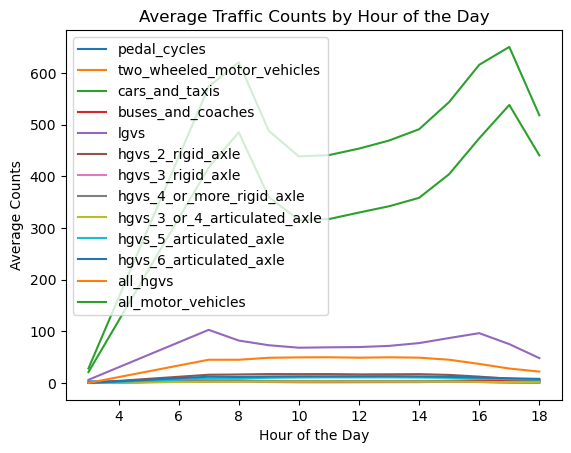

In [16]:
# 3.2 Temporal Trends
# Example: Average number of vehicles per hour across all count points
avg_hourly_counts = pd_raw_count.groupby('hour')[vehicle_columns].mean()
plt.figure(figsize=(30, 18))
avg_hourly_counts.plot()
plt.title('Average Traffic Counts by Hour of the Day')
plt.ylabel('Average Counts')
plt.xlabel('Hour of the Day')
plt.show()

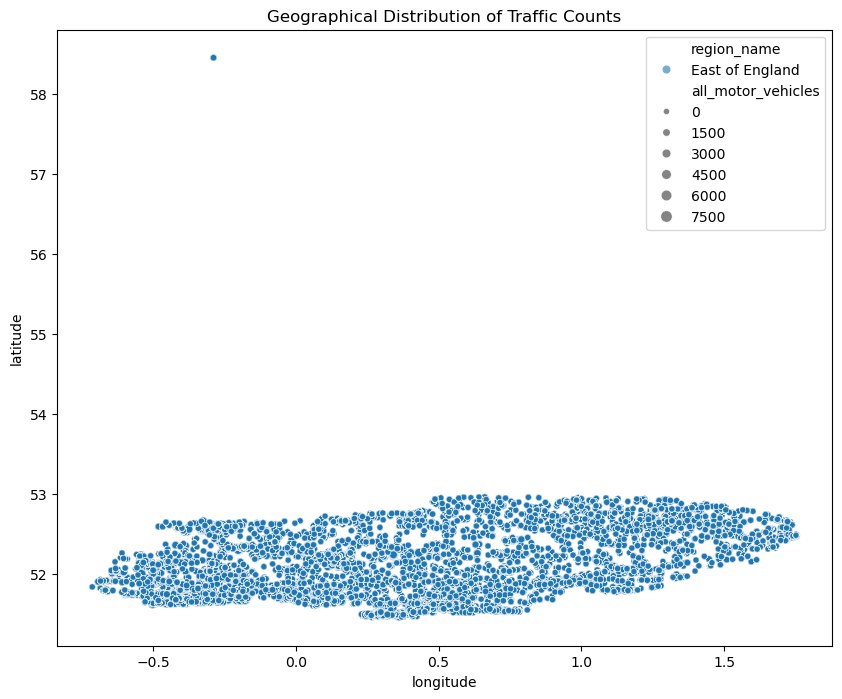

In [17]:
# 3.3 Geographical Analysis
# Scatter plot of traffic counts by location
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pd_raw_count, x='longitude', y='latitude', size='all_motor_vehicles', hue='region_name', alpha=0.6)
plt.title('Geographical Distribution of Traffic Counts')
plt.show()

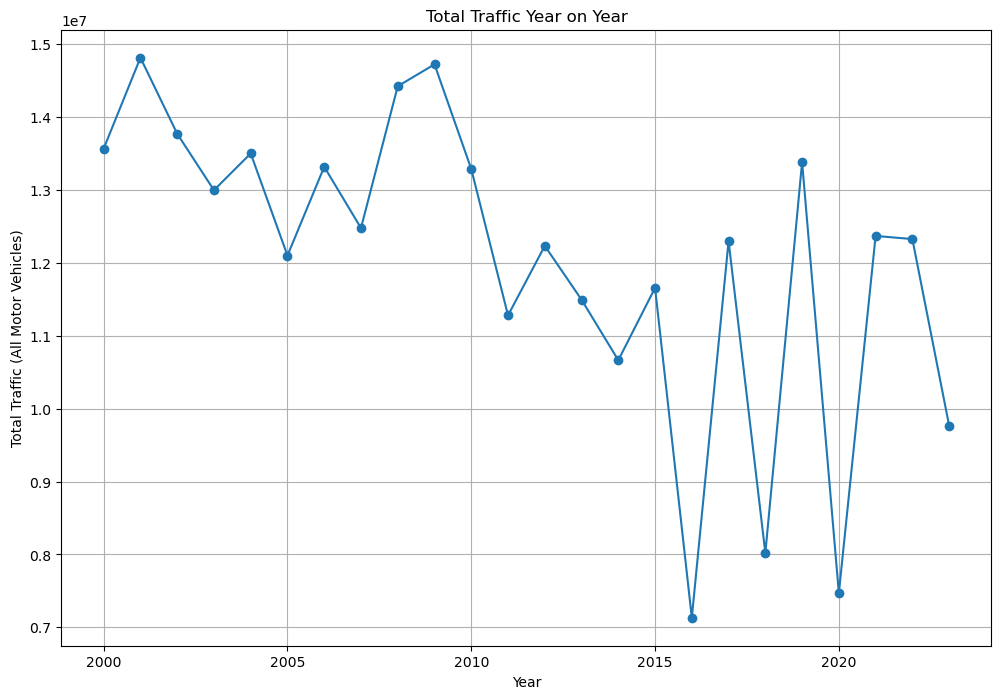

In [41]:
# Aggregate Traffic Data by Year
# Summing up all motor vehicles for each year
yearly_traffic = pd_raw_count.groupby('year')['all_motor_vehicles'].sum().reset_index()

# 2. Plot Year-on-Year Traffic Trends
plt.figure(figsize=(12, 8))
plt.plot(yearly_traffic['year'], yearly_traffic['all_motor_vehicles'], marker='o', linestyle='-')
plt.title('Total Traffic Year on Year')
plt.xlabel('Year')
plt.ylabel('Total Traffic (All Motor Vehicles)')
plt.grid(True)
plt.show()

In [20]:
yearly_traffic.columns

Index(['year', 'all_motor_vehicles'], dtype='object')

In [21]:
# Analyze Overall Patterns
# Calculate the percentage change year on year
yearly_traffic['yearly_change_%'] = yearly_traffic['all_motor_vehicles'].pct_change() * 100

# Print the yearly traffic and percentage change
print(yearly_traffic)

    year  all_motor_vehicles  yearly_change_%
0   2000          13568089.0              NaN
1   2001          14815110.0         9.190837
2   2002          13772152.0        -7.039826
3   2003          12997545.0        -5.624444
4   2004          13501669.0         3.878609
5   2005          12101193.0       -10.372614
6   2006          13318558.0        10.059876
7   2007          12478332.0        -6.308686
8   2008          14424058.0        15.592837
9   2009          14724207.0         2.080892
10  2010          13288277.0        -9.752172
11  2011          11279765.0       -15.114917
12  2012          12233803.0         8.457960
13  2013          11495353.0        -6.036144
14  2014          10664878.0        -7.224441
15  2015          11657227.0         9.304832
16  2016           7131845.0       -38.820399
17  2017          12298714.0        72.447859
18  2018           8019271.0       -34.795858
19  2019          13382236.0        66.875967
20  2020           7469868.0      